<a href="https://colab.research.google.com/github/KyoungmiKwon/Bigdata_Training_at_ITwill/blob/main/Team_Project/news_mecab_install.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

감정 분석 Sentiment Analysis - 2021. 3. 18.
(https://www.youtube.com/watch?v=7GUoDHxN5NM&t=426s)

In [ ]:
# 감정 어휘 사전
# 영어 긍정 부정 library = afinn
# afinn 부르기
# 뉴스 기사

In [ ]:
# 하루 뉴스의 데이터 긍부정 수치를 측정 참조 코드.

# positive = 0
# neutral = 0
# negative = 0

# for i in news:
#     score=afinn.score(i)
#     if score > 0:
#         positive += 1
#     elif score < 0:
#         negative +=1
#     else:
#         neutral += 1

In [ ]:
# 한국어 자연어 처리 konlpy - MeCabMeCab
# 설치
!set -x \
    && pip install konlpy \
    && curl -s https://raw.githubusercontent.com/konlpy/konlpy/master/scripts/mecab.sh | bash -x

+ pip install konlpy
     |████████████████████████████████| 19.4MB 51.8MB/s 
     |████████████████████████████████| 460kB 43.0MB/s 
     |████████████████████████████████| 92kB 11.8MB/s 
  Found existing installation: beautifulsoup4 4.6.3
    Uninstalling beautifulsoup4-4.6.3:
      Successfully uninstalled beautifulsoup4-4.6.3
+ curl -s https://raw.githubusercontent.com/konlpy/konlpy/master/scripts/mecab.sh
+ bash -x
+ mecab_dicdir=/usr/local/lib/mecab/dic/mecab-ko-dic
+ set -e
++ uname
+ os=Linux
+ [[ ! Linux == \L\i\n\u\x ]]
+ hash sudo
+ sudo=sudo
+ python=python3
+ hash pyenv
+ at_user_site=
++ check_python_site_location_is_writable
++ python3 -
+ [[ 1 == \0 ]]
+ hash automake
+ echo 'Installing automake (A dependency for mecab-ko)'
Installing automake (A dependency for mecab-ko)
+ install_automake
+ '[' Linux == Linux ']'
++ grep -Ei 'debian|buntu|mint' /etc/lsb-release /etc/os-release
+ '[' '/etc/lsb-release:DISTRIB_ID=Ubuntu
/etc/lsb-release:DISTRIB_DESCRIPTION="Ubuntu 18.04.

In [ ]:
import re # 레귤러 익스프레션??
import urllib.request
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from konlpy.tag import Mecab
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [ ]:
# 뉴스 데이터 받아오기
test_table = pd.read_csv('/content/drive/MyDrive/yg_test.csv').drop('Unnamed: 0', axis=1)
test_table

,art_title,art_url,art_date,art_main
0,YG서 발빼는 중국 자본…두 달 새 지분 2.3% 매각,https://finance.naver.com/item/news_read.nhn?a...,2020.10.09 17:09,'텐센트 계열' 상하이펑잉41만주 매도…지분 5.7%로 줄어YG엔터테인먼트 사옥. ...
1,"YG엔터, 상하이 펑잉 지분 1.16% 장내 매도",https://finance.naver.com/item/news_read.nhn?a...,2020.10.08 16:37,[이데일리 이슬기 기자] 와이지엔터테인먼트(122870)는 상하이 펑잉 경영자문 파...
2,[하나금투 주간추천주]'실적 잠재력 주목'…삼성전자·CJ제일제당·YG엔...,https://finance.naver.com/item/news_read.nhn?a...,2020.10.03 08:02,[이데일리 김성훈 기자] ◇코스피삼성전자(005930)-IM부문 실적 호조에 따른 ...
3,[연예 마켓+] 승리·양현석 리스크 끝났나…YG엔터 '승승장구',https://finance.naver.com/item/news_read.nhn?a...,2020.09.26 09:05,"YG엔터, 지난해 1월 '버닝썬' 게이트 직격탄루이비통 그룹 채권 상환까지올해 3월..."
4,[하나금투 주간추천주]'실적 잠재력 주목'…삼성전자·CJ제일제당·YG엔...,https://finance.naver.com/item/news_read.nhn?a...,2020.09.25 21:51,[이데일리 김성훈 기자] ◇코스피삼성전자(005930)-IM부문 실적 호조에 따른 ...
...,...,...,...,...
283,"[공시] 빅히트·비엔엑스, 700억원 규모 YG엔터 자회사 지분 취득",https://finance.naver.com/item/news_read.nhn?a...,2021.01.27 18:14,[파이낸셜뉴스] 방탄소년단의 소속사 빅히트와 그 자회사인 비엔엑스는 현금취득과 유상...
284,"YG PLUS, 5년간 빅히트와 협업",https://finance.naver.com/item/news_read.nhn?a...,2021.01.27 17:46,[이데일리 김미영 기자] YG PLUS(037270)는 보통주 315만2584주를 ...
285,"빅히트·비엔엑스, YG PLUS에 700억 투자",https://finance.naver.com/item/news_read.nhn?a...,2021.01.27 17:29,"빅히트·비엔엑스, YG PLUS와 전략적 파트너십플랫폼, 유통, 콘텐츠 등 다양한 ..."
286,"빅히트·비엔엑스, YG PLUS에 투자 및 전략적 파트너십 구축",https://finance.naver.com/item/news_read.nhn?a...,2021.01.27 17:18,"빅히트·비엔엑스, YG PLUS에 700억 규모 투자플랫폼 · 유통 · 콘텐츠 등 ..."


In [ ]:
# 뉴스 중복제거, 개수 측정
test_table.drop_duplicates(subset=['art_title'], inplace=True)

In [ ]:
# 데이터에서 한글,영어 제외하고 모두 제거
# 공란 제거
test_table['art_title'] = test_table['art_title'].str.replace("[^ㄱ-ㅎㅏ-ㅣ가-힣a-zA-Z ]", " ")
test_table['art_main'] = test_table['art_main'].str.replace("[^ㄱ-ㅎㅏ-ㅣ가-힣a-zA-Z ]", " ")
test_table['art_title'].str.strip().replace("", np.nan,)
test_table['art_main'].str.strip().replace("", np.nan)
test_table = test_table.dropna(how='any')
test_table.to_csv('yg_test2')

In [ ]:
test_table.iloc[0][0]

'YG서 발빼는 중국 자본 두 달 새 지분      매각'

In [ ]:
test_table.isnull().sum()

art_title    0
art_url      0
art_date     0
art_main     0
dtype: int64

In [ ]:
stopwords = ['의','가','이','은','들','는','좀','잘','걍','과','도','를','으로','자','에','와','한','하다']
mecab = Mecab()

X_test = []
for s in test_table['art_main']:
    X_test.append([w for w in mecab.morphs(s) if not w in stopwords])
X_test[0]

['텐센트',
 '계열',
 '상하',
 '이펑',
 '잉',
 '만주',
 '매도',
 '지분',
 '로',
 '줄',
 '어',
 'YG',
 '엔터',
 '테',
 '인',
 '먼',
 '트',
 '사옥',
 '사진',
 '연합뉴스',
 '텐센트',
 '계열',
 '중국',
 '자본',
 'YG',
 '엔터',
 '테',
 '인',
 '먼',
 '트',
 '주식',
 '을',
 '장내',
 '에서',
 '대거',
 '처분',
 '하',
 '고',
 '있',
 '다',
 'YG',
 '엔터',
 '시가총액',
 '블랙',
 '핑크',
 '신곡',
 '인기',
 '힘입',
 '어',
 '조원',
 '수준',
 '이르',
 '차익',
 '실현',
 '나섰',
 '다',
 '공연',
 '에서',
 '티켓',
 '파워',
 '부',
 '수익',
 '등',
 '을',
 '노리',
 '고',
 'YG',
 '엔터',
 '투자',
 '지',
 '년',
 '여',
 '만',
 '다',
 '중국',
 '정부',
 '령',
 '한류',
 '제한',
 '령',
 '등',
 '공연',
 '을',
 '통한',
 '수익',
 '창출',
 '어려워진',
 '점',
 '자금',
 '회수',
 '배경',
 '풀이',
 '된다',
 '일',
 '금융',
 '감독원',
 '따르',
 '면',
 'YG',
 '엔터',
 '대주주',
 '인',
 '상하',
 '이펑',
 '잉',
 '경영자',
 '문',
 '파트너십',
 '지난달',
 '일',
 '차례',
 '걸쳐',
 '만',
 '주',
 '장내',
 '매도',
 '했',
 '다',
 '상하',
 '이펑',
 '잉',
 '중국',
 '위',
 '온라인',
 '티케',
 '팅',
 '업체',
 '웨',
 '잉',
 '년',
 '마오',
 '얀',
 '엔터',
 '테',
 '인',
 '먼',
 '트',
 '합병',
 '지분',
 '보유',
 '특수',
 '목적',
 '회사',
 '다',
 '상하',
 '이펑',
 '잉',
 '앞서',
 '월',

In [ ]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts(X_test)
print(tokenizer.word_index)

{'다': 1, '을': 2, '했': 3, '고': 4, '원': 5, '인': 6, '엔터': 7, '하': 8, 'yg': 9, '트': 10, '있': 11, '억': 12, '테': 13, '만': 14, '먼': 15, '일': 16, '블랙': 17, '핑크': 18, '것': 19, '지': 20, '등': 21, '로': 22, '에서': 23, '투자': 24, '경제': 25, '적': 26, '앨범': 27, '할': 28, '빅': 29, '히트': 30, '분기': 31, '며': 32, '기자': 33, '해': 34, '및': 35, '기록': 36, '재': 37, '이익': 38, '영업': 39, '년': 40, '금지': 41, '배포': 42, '트레저': 43, '연구원': 44, '주가': 45, '월': 46, '아티스트': 47, '글로벌': 48, '그룹': 49, '수': 50, '된다': 51, '매출': 52, '중국': 53, '사업': 54, '음반': 55, 'plus': 56, '되': 57, '음원': 58, '무단': 59, '전재': 60, '만장': 61, '실적': 62, '대비': 63, '어': 64, '위': 65, '판매량': 66, '라고': 67, '기대': 68, '면': 69, '예상': 70, '성': 71, '면서': 72, '까지': 73, '컴백': 74, '콘서트': 75, '주': 76, '전망': 77, '데뷔': 78, '된': 79, '성장': 80, '게': 81, '지난': 82, '증권': 83, '코로나': 84, '중': 85, '올해': 86, '빅뱅': 87, '었': 88, '증가': 89, '권': 90, '공연': 91, '뉴스': 92, '가능': 93, '유통': 94, '네이버': 95, 'co': 96, 'kr': 97, '전': 98, '시장': 99, '기': 100, '금융': 101, '머니': 102, 'com': 103, '투데

In [ ]:
# 빈도수 낮은 단어 제거
threshold = 3
words_cnt = len(tokenizer.word_index)
rare_cnt = 0
words_freq = 0
rare_freq = 0

for key, value in tokenizer.word_counts.items():
    words_freq = words_freq + value
    if value < threshold:
        rare_cnt += 1
        rare_freq = rare_freq + value
print("전체단어수", words_cnt)
print(f"빈도수 {threshold-1} 이하인 단어수:", rare_cnt)
print("희귀 단어 비율:", rare_cnt / words_cnt )
print("희귀 단어 등장 빈도 비율:", rare_freq / words_freq)

전체단어수 4182
빈도수 2 이하인 단어수: 2184
희귀 단어 비율: 0.5222381635581061
희귀 단어 등장 빈도 비율: 0.04630022521787381


In [ ]:
# 데이터
vocab_size = words_cnt - rare_cnt + 2
tokenizer = Tokenizer(vocab_size, oov_token='OOV')
tokenizer.fit_on_texts(X_test)
X_test = tokenizer.texts_to_sequences(X_test)

In [ ]:
# y_test
# y_test = np.array(test_table['art_l'])

In [ ]:
X_test[0]

[266,
 812,
 327,
 345,
 272,
 522,
 633,
 155,
 23,
 356,
 65,
 10,
 8,
 14,
 7,
 16,
 11,
 405,
 288,
 1015,
 266,
 812,
 54,
 486,
 10,
 8,
 14,
 7,
 16,
 11,
 321,
 3,
 1097,
 24,
 1637,
 928,
 9,
 5,
 12,
 2,
 10,
 8,
 314,
 18,
 19,
 295,
 289,
 929,
 65,
 523,
 231,
 667,
 1233,
 1016,
 865,
 2,
 92,
 24,
 596,
 1,
 524,
 106,
 22,
 3,
 1,
 5,
 10,
 8,
 25,
 21,
 41,
 346,
 15,
 2,
 54,
 930,
 186,
 487,
 931,
 186,
 22,
 92,
 3,
 466,
 106,
 716,
 1,
 224,
 597,
 634,
 932,
 765,
 52,
 17,
 102,
 1017,
 189,
 70,
 10,
 8,
 554,
 7,
 327,
 345,
 272,
 1234,
 1098,
 933,
 322,
 17,
 866,
 1378,
 15,
 77,
 1097,
 633,
 4,
 2,
 327,
 345,
 272,
 54,
 66,
 109,
 1638,
 1099,
 406,
 867,
 272,
 41,
 1,
 1639,
 8,
 14,
 7,
 16,
 11,
 1640,
 155,
 140,
 868,
 1235,
 165,
 2,
 327,
 345,
 272,
 407,
 47,
 17,
 866,
 23,
 1,
 15,
 77,
 633,
 4,
 2,
 232,
 327,
 345,
 272,
 10,
 8,
 321,
 633,
 1641,
 15,
 15,
 6,
 231,
 2,
 280,
 573,
 1,
 813,
 633,
 23,
 280,
 9,
 123,
 327,
 345,
 272

In [ ]:
# 빈도수 낮은 단어들을 제거하고 빈칸이된 데이터 제거
drop_test = [index for index, sentence in enumerate(X_test) if len(sentence) < 1]
X_test = np.delete(X_test, drop_test, axis=0)
# y_test = np.delete(y_test, drop_test, axis=0)

In [ ]:
# 패딩
# 최대 길이, 평균 길이
max(len(l) for l in X_test),sum(len(l) for l in X_test)/len(X_test)

(1473, 300.3627450980392)

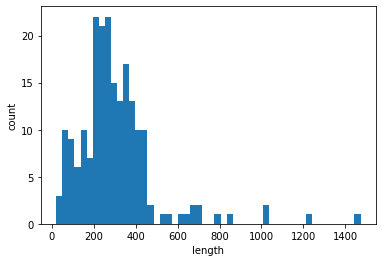

In [ ]:
plt.hist([len(s) for s in X_test], bins=50)
plt.xlabel('length')
plt.ylabel('count')
plt.show()
# 임시로 대충 평균의 두배인 600정도로 잡자

In [ ]:
max_len = 600
X_test = pad_sequences(X_test, maxlen = max_len)

In [ ]:
# 모델
# from tensorflow.keras.layers import Embedding, Dense, LSTM
# from tensorflow.keras.models import Sequential

# model= Sequential()
# model.add(Embedding(vocab_size, 100))
# model.add(LSTM(128))
# model.add(Dense(1, activation='sigmoid'))
# model.summary()
# dropout 추가해 오버피팅 방지

# model.compile(optimizer='rmsprop',
#               loss='binary_crossentropy',
#               metrics=['acc'])
# history = model.fit(X,y,epochs=15, batch_size=60, validation_split=0.2)

In [ ]:
# 원핫 인코딩으로 임베딩하는것보다 gensim이라는 패키지를 이용하는게 좋다는데?
# https://ebbnflow.tistory.com/153

In [ ]:
# 감정 예측
# def sentiment_predict(new_sentence):
#     new_token = [w for w in mecab.morphs(new_sentence) if not w in stopwords]
#     new_sequences = tokenizer.texts_to_sequences([new_token])
#     new_pad = pad_sequences(new_sequences, maxlen = max_len)
#     score = float(model.predict(new_pad))

#     if score > 0.5:
#         print('긍정:',new_sentence,score)
#     else:
#         print('긍정:',new_sentence,(1-score))